In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [5]:
from src import ComputationalHypergraphDiscovery as CHD

In [6]:
from src.ComputationalHypergraphDiscovery import interpolatory,non_interpolatory
from src.ComputationalHypergraphDiscovery import helper_functions as hf

In [7]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jax import vmap
from jax import random
from jax import jit
from functools import partial

In [38]:
#generate some random data
key = random.PRNGKey(0)
n_samples=200
key, *subkeys = random.split(key, 3)

X = random.normal(subkeys[0], (n_samples, 5))
#ga=random.normal(subkeys[1], (n_samples,))
#compute the kernel matrix and time it
active_modes=jnp.eye(5)

In [39]:
kernels=[CHD.Modes.LinearMode(),CHD.Modes.QuadraticMode()]
gamma_min=1e-9
names=[f'x{i}' for i in range(X.shape[1])]

g=CHD.GraphDiscovery(X,names,kernels=[CHD.Modes.LinearMode(),CHD.Modes.QuadraticMode()])

['x0', 'x1', 'x2', 'x3', 'x4'] [Array(1, dtype=int64), Array(1, dtype=int64), Array(1, dtype=int64), Array(1, dtype=int64), Array(1, dtype=int64)] [Array(0, dtype=int64), Array(0, dtype=int64), Array(0, dtype=int64), Array(0, dtype=int64), Array(0, dtype=int64)] [Array([[0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float64), Array([[1., 0., 1., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float64), Array([[1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float64), Array([[1., 1., 1., 0., 1.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float64), Array([[1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float64)] [Array([1.14570581e-11, 1.00000092e+00, 9.99998298e-01, 1.00000137e+00]

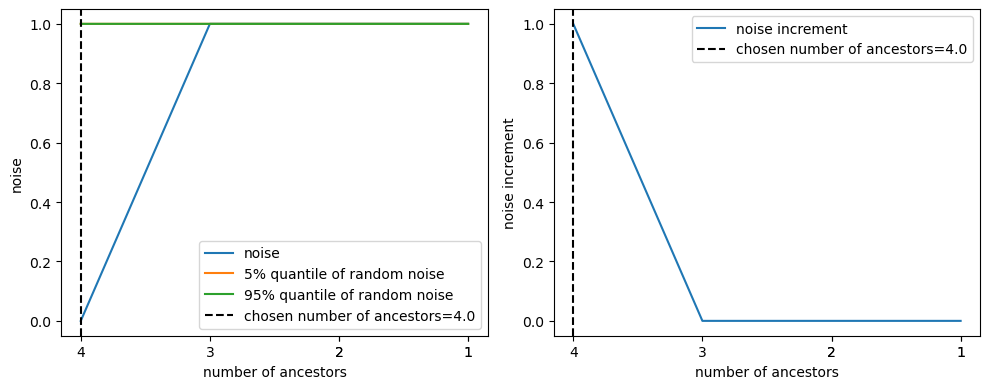

x1 has ancestors with the kernel quadratic | (n/(s+n)=0.00)


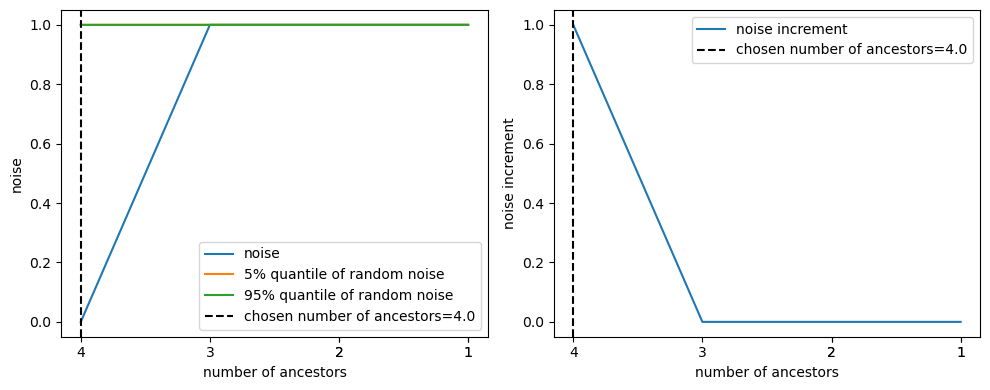

x2 has ancestors with the kernel quadratic | (n/(s+n)=0.00)


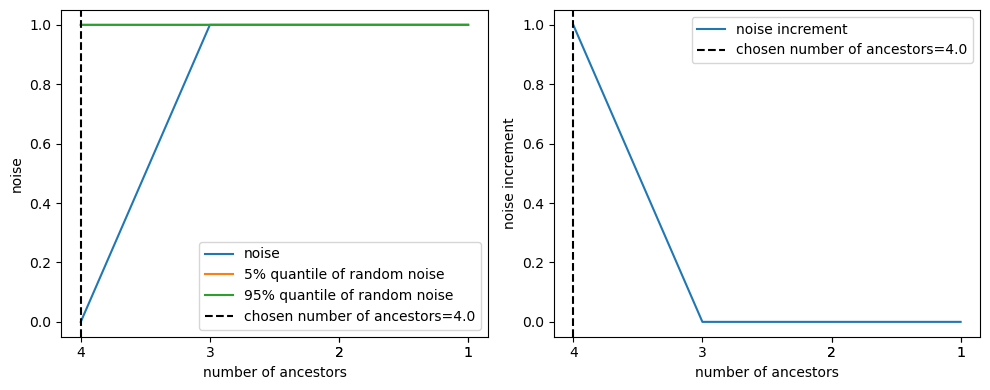

x3 has ancestors with the kernel quadratic | (n/(s+n)=0.00)


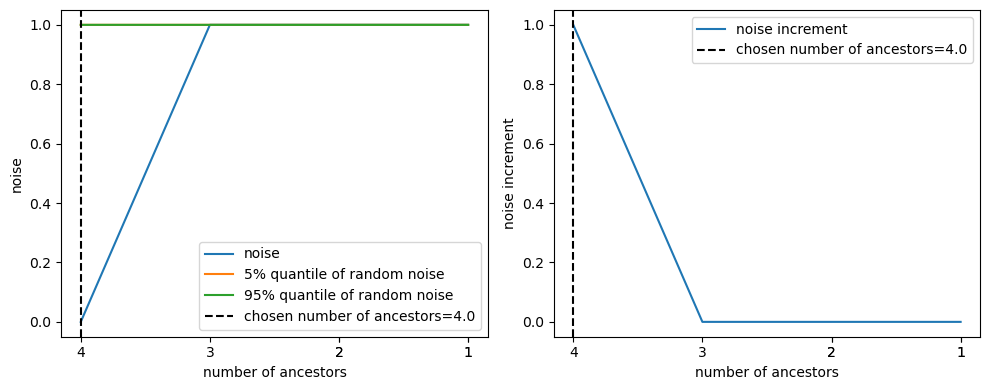

x4 has ancestors with the kernel quadratic | (n/(s+n)=0.00)


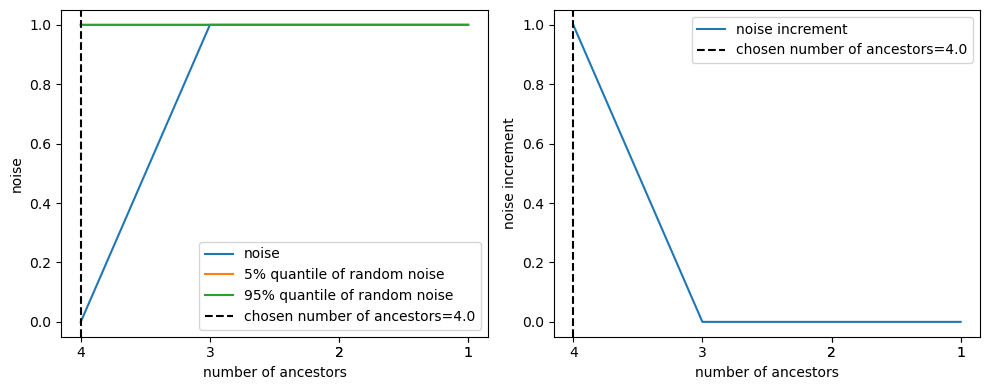

In [40]:
g.fit()

In [ ]:
import jax.numpy as jnp
from jax import jit

class KernelSelector:
    def __call__(self, kernel_perfs):
        """
        Chooses the kernel with the least noise and such that noise is lower than random noise Z
        """
        ybs, noises, Z_lows, Z_highs, gammas, keys = kernel_perfs

        # Create a mask for conditions where noise is less than min_noise and noise is less than Z_low
        valid_indices = (noises < Z_lows)

        # Use jnp.where to find the first valid index, default to -1 if no valid index (like None in original)
        selected_index = jnp.max(jnp.where(valid_indices, jnp.arange(noises.shape[0]), -1))

        return (
            selected_index,
            ybs[selected_index],
            noises[selected_index],
            Z_lows[selected_index],
            Z_highs[selected_index],
            gammas[selected_index],
            keys[selected_index],
        )

# Make sure to compile this method using JIT for performance
selector = KernelSelector()
selector_jit = jit(selector.__call__)


In [ ]:
#random array of kernel performances shape (6,10)

kernel_perfs=random.normal(subkeys[1],(6,10))
print(kernel_perfs)
selector_jit(kernel_perfs)

[[ 0.05404495 -0.67189044 -0.22298526 -0.61393038  1.03207959  1.19301193
   0.9380828  -1.14103498  0.18261588  0.15685536]
 [ 0.05512311 -0.00484905 -0.23278948  0.28306777 -0.26413154  0.92874774
   0.70395096 -0.60578277 -0.09255297  0.37261559]
 [-0.72471785 -2.11854093 -0.35610219  0.42812272 -0.80407861 -0.48996551
  -0.7219868  -1.04333445  1.33341186 -0.03301899]
 [-0.06971528  0.50173168 -1.21191926  1.61176868  1.51661869  0.36997666
  -0.36118161 -1.70563776  1.35295175  0.18621596]
 [-1.48486916 -0.11050344 -0.40183822  0.40717532 -1.14154662  1.14333465
   0.876417   -1.08386336 -1.22736671 -1.66393706]
 [-0.09094009 -0.23032646 -1.28330913  0.71400445  1.25246295  0.56548016
   1.45510788  0.98103655  0.41110428 -0.42743595]]


(Array(8, dtype=int64),
 Array(0.18261588, dtype=float64),
 Array(-0.09255297, dtype=float64),
 Array(1.33341186, dtype=float64),
 Array(1.35295175, dtype=float64),
 Array(-1.22736671, dtype=float64),
 Array(0.41110428, dtype=float64))